   Id       State  TotalPop             Hispanic                White  \
0   0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1   1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2   2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3   3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4   4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F  
1   1.058682

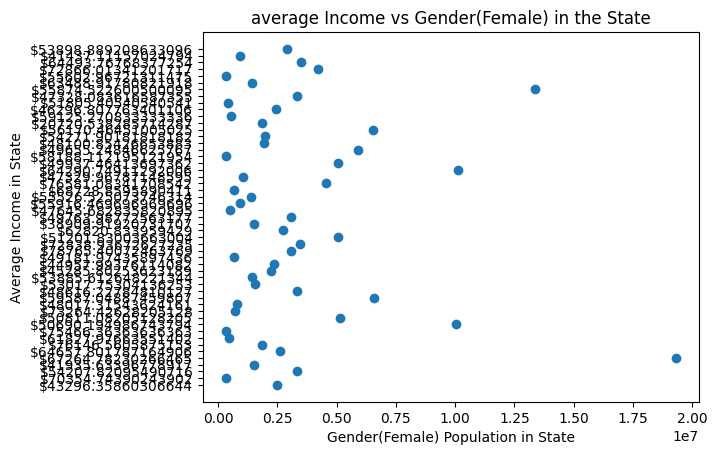

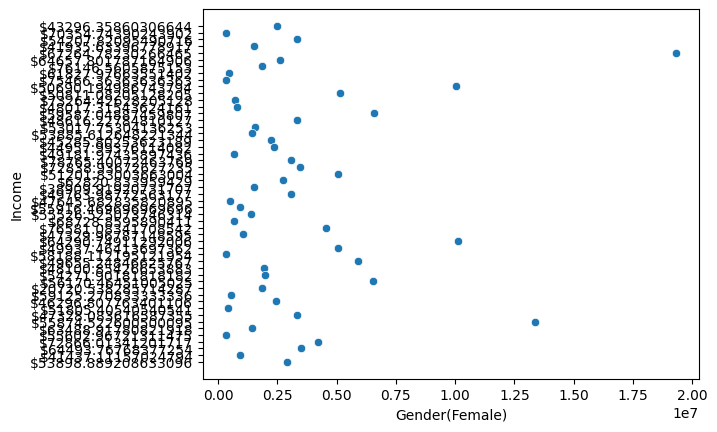

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob # glob is a module that is used to read multiple files
# The glob module, which is short for global, is a function that’s used to search for files that match a specific file pattern or name. 
# It can be used to search CSV files and for text in files. 



df = pd.read_csv('./US_Census Data Cleaning/states0.csv') # default sep is ','
df.columns = ['Id', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'] # modify column names 
#df.to_csv('./US_Census Data Cleaning/states0.csv', index=False, header=True) 
# save the file with new column names , index=False means not to save the index column
# to_csv() is a method of DataFrame class that is used to save the DataFrame to a csv file, it will modify the original file and save it
print(df.head())

path = r'./US_Census Data Cleaning' # r means raw string , it is used to ignore the special characters in the string
files = glob.glob(path + '/states*.csv') # * means any characters that follow the pattern 'states' e.g. states0.csv, states1.csv, states2.csv, etc.
print("List of Files", files) # print the list of files that match the pattern
print("-----------------------------------------------------------------------------------------------------------------------------------------------------------")
df_list = []
for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0) # index_col=None means not to use the first column as index, header=0 means use the first row as column names
    df.columns = ['Id', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'] # modify column names
    df_list.append(df) # append the DataFrame to the list, the list will contain all the DataFrames that match the pattern
    df_merge = pd.concat(df_list, axis=0, ignore_index=True) # concat() is a method of pandas that is used to concatenate DataFrames, axis=0 means concatenate along the rows, ignore_index=True means ignore the original index and create a new index
    df_merge = df_merge.drop(['Id'], axis=1) # drop() is a method of DataFrame class that is used to drop a column or a row, axis=1 means drop a column
    df_merge = df_merge.reset_index(drop=True) # reset_index() is a method of DataFrame class that is used to reset the index, drop=True means drop the original index and create a new index
    df_merge.to_csv('./US_Census_Data_Merged_Solution.csv', header=True) # save the merged DataFrame to a csv file , index=False means not to save the index column(True by default), header=True means save the column names

print(df_list) # print the list of DataFrames
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(df_merge) # print the merged DataFrame 

print("------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Check the dataTypes and Columns of the Merge DataFrame
print(df_merge.columns) # print the column names of the merged DataFrame
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(df_merge.dtypes) # print the dataTypes of the merged DataFrame
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(df_merge.head()) # print the first 5 rows of the merged DataFrame
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")

"""
The data type of a column in a DataFrame can be determined by pandas automatically, based on the data in that column. 
If pandas is unable to infer the data type of a column, it will assign the "object" data type as a fallback.

Here are some reasons why your DataFrame may have "object" data types:

1. The column may contain a mix of different data types, such as strings, integers, and floats. When pandas encounters such a column, it assigns the "object" data type.
2. The column may contain missing or null values. In this case, pandas assigns the "object" data type as a placeholder until it can determine the correct data type.
3. The data in the column may be in a format that pandas does not recognize. For example, if a column contains dates in a non-standard format, 
pandas may not be able to infer the data type and will assign "object" as a fallback.

To address this issue, you can use the astype() method to convert the data type of a column to a more appropriate type. 
For example, if a column contains only numeric data, you can convert it to the "float" data type using df['column_name'] = df['column_name'].astype(float).
"""

# Split the GenderPop Column into two columns , Gender(Male) and Gender(Female)

df_merge[['Gender(Male)','Gender(Female)']] = df_merge.GenderPop.str.split("_",expand=True) # str.split() is a method of string class that is used to split a string into a list, expand=True means expand the split strings into separate columns
print(df_merge.head()) # print the first 5 rows of the merged DataFrame
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
df_dropped = df_merge.drop(['GenderPop'], axis=1, inplace=False) # drop the GenderPop column, inplace=False means not to modify the original DataFrame
print(df_dropped.head()) # print the first 5 rows of the merged DataFrame
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Replace the M and F from Gender(Male) and Gender(Female) Column entries

df_dropped['Gender(Male)'] = df_dropped['Gender(Male)'].str.replace('M', '') # str.replace() is a method of string class that is used to replace a substring with another substring
df_dropped['Gender(Female)'] = df_dropped['Gender(Female)'].str.replace('F', '')
print(df_dropped.head()) # print the first 5 rows of the merged DataFrame

print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(df_dropped[['Gender(Female)','Gender(Male)']])  # have NaN values or missing values, can't convert to int data type due to NaN values, missing values are in Gender(Female) Column only so,
# fill the NaN values by subtracting the Gender(Male) Column values from the TotalPop Column values and then convert the data type of the columns to int
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Convert the Gender(Male) Column to int data type as it doesn't have any NaN values , otherwise it will throw an error on subtracting Object data type from int data type
df_dropped['Gender(Male)'] = df_dropped[['Gender(Male)']].astype('int64') # convert the data type of the column to int, # assigning the converted column to the original column , 
#without assigning it to the original column, the changes will not be reflected in the original DataFrame.
print(df_dropped.dtypes)
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
df_dropped.replace('missing_value', np.nan, inplace=True) # replace the NaN values with 0, inplace=True means modify the original DataFrame


# fill the NaN/''(completed blanked) values in the Women column for each state 
for state in df_dropped['State'].unique(): # unique() is a method of DataFrame class that is used to get the unique values of a column, here we are getting the unique values of the State column then iterating over them
    men_pop = df_dropped.loc[df_dropped['State'] == state, 'Gender(Male)'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the gender(male) column from the selected rows and then converting it to a list and then selecting the first element of the list
    # selecting the values[0] first and only element of the list
    total_pop = df_dropped.loc[df_dropped['State'] == state, 'TotalPop'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the TotalPop column from the selected rows and then converting it to a list and then selecting the first element of the list
    # calculate the women value in the women column for the current state with the calculated women value.
    women_pop = total_pop - men_pop
    df_dropped.loc[(df_dropped['State'] == state) & (df_dropped['Gender(Female)'] == ''), 'Gender(Female)'] = women_pop # fill the Nan value in women's column where it is completely blank and the state is equal to the current state 


print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(df_dropped[['Gender(Female)','Gender(Male)']])

# convert both columns into numerical data types
print(df_dropped.dtypes)
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
df_dropped[['Gender(Female)','Gender(Male)']] = df_dropped[['Gender(Female)','Gender(Male)']].astype('int64') # convert the data type of the columns to int
print(df_dropped.dtypes)
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")

# drop the duplicates from the DataFrame
df_dropped.drop_duplicates(inplace=True) # drop the duplicates from the DataFrame, inplace=True means modify the original DataFrame
print(df_dropped) # print df
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")


# Making scatter plots of the data to explore the relationships between variables
# Scatter plots are useful for exploring relationships between two numeric variables.
# The relationship between two variables can be positive, negative, or no relationship at all.
# A duplicate column/row in dataframe in scatter plot will cause the plot to be distorted, so we need to drop the duplicates from the DataFrame ( We already Dropped them above)

# Scatter Plot of average Income vs Gender(Female) in the State
%matplotlib inline
x = df_dropped['Gender(Female)']
y = df_dropped['Income']

plt.scatter(x,y)

# Add labels and title
plt.xlabel('Gender(Female) Population in State')
plt.ylabel('Average Income in State')
plt.title('average Income vs Gender(Female) in the State')
plt.savefig('matplotlib_averageIncomevsGender(Female).png')

plt.show()

sns.scatterplot(df_dropped, x='Gender(Female)', y='Income')
plt.savefig('seaborn_averageIncomevsGender(Female).png')
plt.show()





In [3]:
# Print Histograms of The Races in the State 
# Histograms are useful for exploring the distribution of a single numeric variable.
# The x-axis represents the values of the variable, and the y-axis represents the frequency of those values.
# The shape of the histogram can give you a sense of the distribution of the variable.
# The more spread out the values are, the more spread out the histogram will be.
# The more concentrated the values are, the more narrow the histogram will be.

print(df_dropped.columns)
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")


Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Gender(Male)', 'Gender(Female)'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------------


              Hispanic               White               Black  \
0   3.7516156462584975     61.878656462585   31.25297619047618   
1    5.909580838323351  60.910179640718574  2.8485029940119775   
2   29.565921052631502  57.120000000000026  3.8509868421052658   
3    6.215474452554738   71.13781021897813  18.968759124087573   
4   37.291874687968054   40.21578881677474   5.677396405391911   
5    20.78438003220608   69.89557165861504   3.546376811594201   
7   15.604830917874388    67.6770531400966   10.34806763285027   
8     8.82476635514019   64.63271028037383  20.743925233644834   
9    9.165921787709499  33.103910614525134   51.77653631284915   
10    21.3385426653884   59.08374880153398  15.165675934803444   
11   8.418242207460397   54.28630556974962   32.08829841594277   
13   9.186708860759486  25.032278481012657   2.052848101265823   
14  11.505369127516781    83.1362416107383  0.5667785234899323   
15  15.601733547351516   60.85980738362764  17.108410914927717   
16   6.536

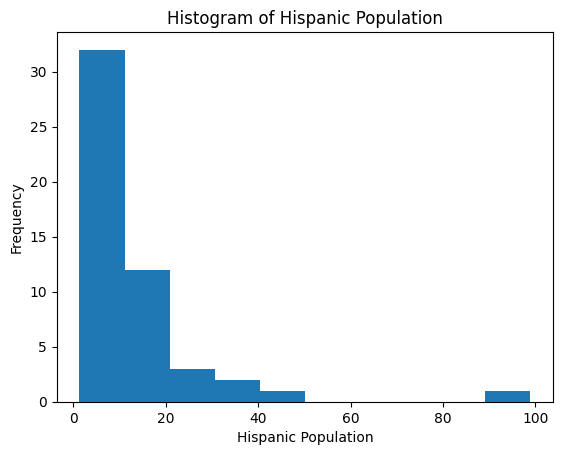

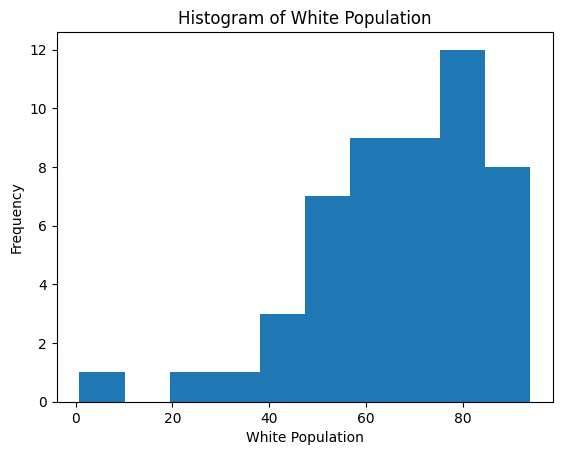

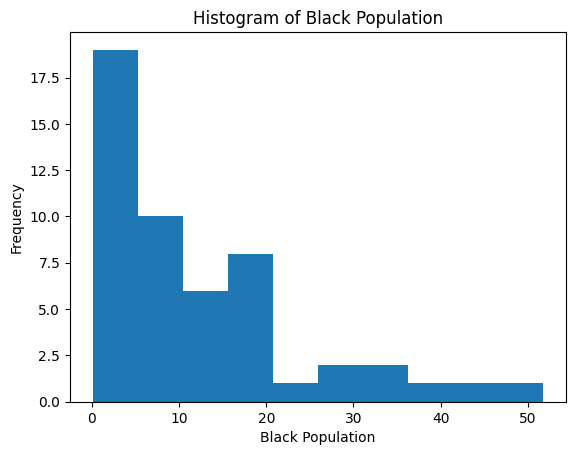

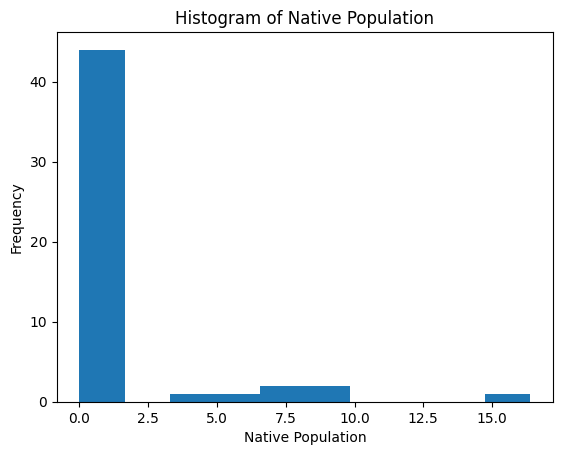

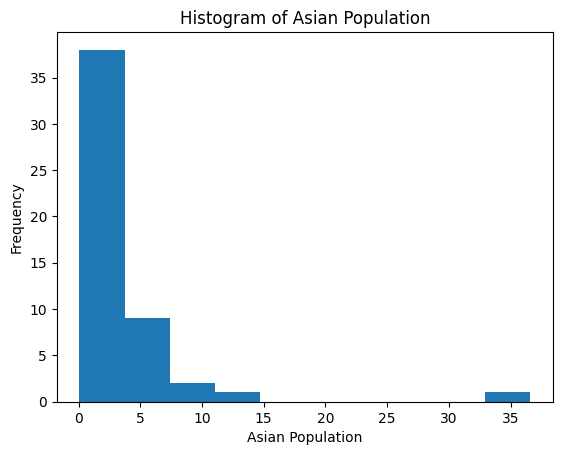

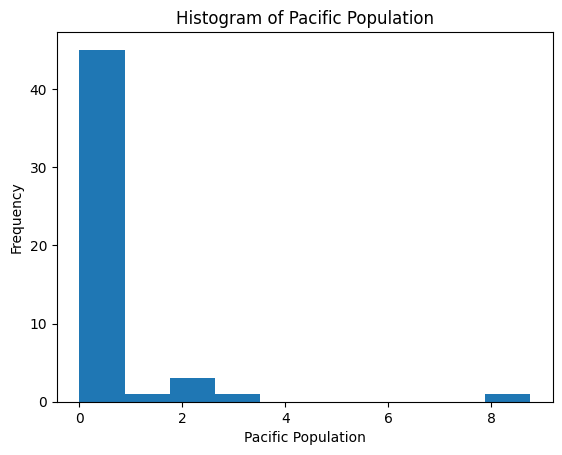

In [4]:
df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']] = df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']].apply(lambda x: x.str.replace('%', '')) # replace the % sign from the values of the columns\
# str.replace() is a method of string class that is used to replace a substring with another substring
print(df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']]) # print the columns of the DataFrame
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']] = df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']].astype('float64') # convert the data type of the columns to float
print(df_dropped.dtypes) # print the data types of the columns of the DataFrame
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")

# fill the NaN values in the race columns by subtracting all 
for state in df_dropped['State'].unique(): # unique() is a method of DataFrame class that is used to get the unique values of a column, here we are getting the unique values of the State column then iterating over them
    hispanic_pop = df_dropped.loc[df_dropped['State'] == state, 'Hispanic'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the Hispanic column from the selected rows and then converting it to a list and then selecting the first element of the list
    white_pop = df_dropped.loc[df_dropped['State'] == state, 'White'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the White column from the selected rows and then converting it to a list and then selecting the first element of the list
    black_pop = df_dropped.loc[df_dropped['State'] == state, 'Black'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the Black column from the selected rows and then converting it to a list and then selecting the first element of the list
    native_pop = df_dropped.loc[df_dropped['State'] == state, 'Native'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the Native column from the selected rows and then converting it to a list and then selecting the first element of the list
    asian_pop = df_dropped.loc[df_dropped['State'] == state, 'Asian'].values[0] # selecting the rows of df where the 'State' column equals the variable 'state' and the Asian column from the selected rows and then converting it to a list and then selecting the first element of the list

    pacific_pop = 100 - hispanic_pop - white_pop - black_pop - native_pop - asian_pop # calculate the pacific value in the pacific column for the current state with the calculated pacific value.
    df_dropped.loc[(df_dropped['State'] == state) & (df_dropped['Pacific'].isnull()), 'Pacific'] = pacific_pop # fill the Nan value in pacific's column where it is completely blank and the state is equal to the current stateq

print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(df_dropped[['Hispanic','White','Black','Native','Asian','Pacific']]) # print the columns of the DataFrame
print("------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Histogram of Hispanic Population
plt.hist(df_dropped['Hispanic'])
plt.xlabel('Hispanic Population')
plt.ylabel('Frequency')
plt.title('Histogram of Hispanic Population')
plt.savefig('matplotlib_HistogramofHispanicPopulation.png')
plt.show()

# Histogram of White Population
plt.hist(df_dropped['White'])
plt.xlabel('White Population')
plt.ylabel('Frequency')
plt.title('Histogram of White Population')
plt.savefig('matplotlib_HistogramofWhitePopulation.png')
plt.show()

# Histogram of Black Population
plt.hist(df_dropped['Black'])
plt.xlabel('Black Population')
plt.ylabel('Frequency')
plt.title('Histogram of Black Population')
plt.savefig('matplotlib_HistogramofBlackPopulation.png')
plt.show()

# Histogram of Native Population
plt.hist(df_dropped['Native'])
plt.xlabel('Native Population')
plt.ylabel('Frequency')
plt.title('Histogram of Native Population')
plt.savefig('matplotlib_HistogramofNativePopulation.png')
plt.show()

# Histogram of Asian Population
plt.hist(df_dropped['Asian'])
plt.xlabel('Asian Population')
plt.ylabel('Frequency')
plt.title('Histogram of Asian Population')
plt.savefig('matplotlib_HistogramofAsianPopulation.png')
plt.show()

# Histogram of Pacific Population
plt.hist(df_dropped['Pacific'])
plt.xlabel('Pacific Population')
plt.ylabel('Frequency')
plt.title('Histogram of Pacific Population')
plt.savefig('matplotlib_HistogramofPacificPopulation.png')
plt.show()



